# Case Study - Group 11 (S11)

### Group Members
- **Darylle Xander Calugtong**
- **Graham Joshua Ogatia**
- **Joshua Permito**
- **Shem Matthew Salih**

## Dataset Information
Our chosen dataset is the [Valorant Leaderboard Statistics](https://www.kaggle.com/datasets/aliibrahim10/valorant-stats).
This dataset contains [tracker.gg](https://tracker.gg/) statistics with 80,000+ observations and 38 variables
from **Episode 4: Act 3** (April 2022) of the game **Valorant**.
### Important
The observations in the dataset only contain players who are **Immortal** and **Radiant** rank except for a few players
who were demoted at the time of data collection.
Additionally, only those who consent for the platform [tracker.gg](https://tracker.gg) to gather their statistics have their data in the dataset.
### Collection
The platform [tracker.gg](https://tracker.gg/) collects the data from the game **Valorant**.
This site is a third-party platform that tracks the statistics of players in the game.
It is a third-party platform that is not affiliated with the game developers.

## Dataset Structure
Each row represents a player's statistics in the game **Valorant**.
Each column represents a variable that describes the player's statistics.

### Variables
- `region` - The region of the player.
- `name` - The name of the player. (used together with `tag`)
- `tag` - The tag of the player. (used together with `name`)
- `rating` - The rank of the player.
- `damage_round` - The average damage per round of the player in all matches.
- `headshots` - Total number of headshots of the player in all matches.
- `headshot_percent` - Percentage of total hit shots that are headshots of the player in all matches.
- `aces` - Total number of aces of the player in all matches. An ace is when a player kills all 5 players in the enemy team in a single round.
- `clutches` - Total number of clutches of the player in all matches. A clutch is when a player wins a round when they are the last player alive in their team.
- `flawless` - Total number of flawless rounds of the player in all matches. A flawless round is when a team wins a round without any of their players dying.
- `first_bloods` - Total number of first bloods of the player in all matches.
- `kills` - Total number of kills of the player in all matches.
- `deaths` - Total number of deaths of the player in all matches.
- `assists` - Total number of assists of the player in all matches.
- `kd_ratio` - The kill-death ratio of the player in all matches.
- `kills_round` - Average number of kills per round of the player in all matches.
- `most_kills` - Most number of kills in a single match of the player in all matches.
- `score_round` - Average score per round of the player in all matches.
- `wins` - Total number of wins of the player in all matches.
- `win_percent` - Percentage of total matches won of the player in all matches.
- `agent_1` - Most played agent of the player in all matches based on hours.
- `agent_2` - Second most played agent of the player in all matches based on hours.
- `agent_3` - Third most played agent of the player in all matches based on hours.
- `gun1_name` - Player's best gun in all matches based on kills.
- `gun1_head` - Percentage of total hit shots that are headshots of the player using `gun1_name` in all matches.
- `gun1_body` - Percentage of total hit shots that are body shots of the player using `gun1_name` in all matches.
- `gun1_legs` - Percentage of total hit shots that are leg shots of the player using `gun1_name` in all matches.
- `gun1_kills` - Total number of kills of the player using `gun1_name` in all matches.
- `gun2_name` - Player's second-best gun in all matches based on kills.
- `gun2_head` - Percentage of total hit shots that are headshots of the player using `gun2_name` in all matches.
- `gun2_body` - Percentage of total hit shots that are body shots of the player using `gun2_name` in all matches.
- `gun2_legs` - Percentage of total hit shots that are leg shots of the player using `gun2_name` in all matches.
- `gun2_kills` - Total number of kills of the player using `gun2_name` in all matches.
- `gun3_name` - Player's third-best gun in all matches based on kills.
- `gun3_head` - Percentage of total hit shots that are headshots of the player using `gun3_name` in all matches.
- `gun3_body` - Percentage of total hit shots that are body shots of the player using `gun3_name` in all matches.
- `gun3_legs` - Percentage of total hit shots that are leg shots of the player using `gun3_name` in all matches.
- `gun3_kills` - Total number of kills of the player using `gun3_name` in all matches.

# Preprocessing

### Import Libraries
First, we need to import the necessary libraries.

We will be using the following libraries:
- `pandas` - for data manipulation
- `numpy` - for mathematical operations
- `mplcatppuccin` - matplotlib theme (installed as `catppuccin-matplotlib`)
- `matplotlib` - for data visualization
- `seaborn` - for data visualization (together with `matplotlib`)

In [626]:
import pandas as pd
import numpy as np
import mplcatppuccin as cpt
import matplotlib.style as mplstyle
import matplotlib.pyplot as plt
import seaborn as sns

Set the theme to `mocha` from catppuccin and load colormaps

In [718]:
mplstyle.use('mocha')
cmap = cpt.get_colormap_from_list('mocha', ['red', 'yellow', 'blue'])

### Importing the Dataset

In [628]:
# Only consider blank cells as NA, and thousands to specify the thousands separator
val_df = pd.read_csv('val_stats.csv', thousands=',', keep_default_na=False, na_values=[''],
                     dtype={'region':'category', 'rating':'category'})
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


### List of all variables

In [629]:
[col for col in val_df.columns]

['region',
 'name',
 'tag',
 'rating',
 'damage_round',
 'headshots',
 'headshot_percent',
 'aces',
 'clutches',
 'flawless',
 'first_bloods',
 'kills',
 'deaths',
 'assists',
 'kd_ratio',
 'kills_round',
 'most_kills',
 'score_round',
 'wins',
 'win_percent',
 'agent_1',
 'agent_2',
 'agent_3',
 'gun1_name',
 'gun1_head',
 'gun1_body',
 'gun1_legs',
 'gun1_kills',
 'gun2_name',
 'gun2_head',
 'gun2_body',
 'gun2_legs',
 'gun2_kills',
 'gun3_name',
 'gun3_head',
 'gun3_body',
 'gun3_legs',
 'gun3_kills']

# Data Cleaning

## Check for Multiple Representations
Let's proceed to check for multiple representations of values. We will be focusing on categorical variables of `rating`, `region`, `agent_1`, and `gun1_name`.

For the `rating`, let's first list down all the unique values of the variable.

In [630]:
ratings_df = pd.DataFrame(val_df['rating'].unique(), columns=['Rating'])
ratings_df

,Rating
0,Radiant
1,Immortal 3
2,Immortal 2
3,Immortal 1
4,Silver 2
5,Gold 2
6,Diamond 3
7,Gold 1
8,Unrated
9,Platinum 1


Valorant follows the [ranking system](https://support-valorant.riotgames.com/hc/en-us/articles/360047937633-VALORANT-Competitive-Mode-FAQ) of **Iron**, **Bronze**, **Silver**, **Gold**, **Platinum**, **Diamond**, **Ascendant**, **Immortal**, and **Radiant**. Excluding **Radiant**, each rank is divided into three tiers of **1**, **2**, and **3** wherein the higher the number reflects better ranking. Players who do not have a rank are considered **Unrated**. With that in mind, the values of `rating` are considered valid as they are all within the game's ranking system. It could also be observed that there no multiple representations of a rank. 

Now for `region`, `agent_1`, and `gun1_name`, let's check for their representation and validity.

In [631]:
regions_df = pd.DataFrame(val_df['region'].unique(), columns=['Region'])
regions_df

,Region
0,NA
1,EU
2,AP
3,KR
4,BR
5,LAT


In [632]:
agent_1_df = pd.DataFrame(val_df['agent_1'].unique(), columns=['Agent'])
agent_1_df

,Agent
0,Fade
1,Chamber
2,Yoru
3,Jett
4,Sage
5,KAY/O
6,Sova
7,Raze
8,Omen
9,Breach


In [633]:
gun1_name_df = pd.DataFrame(val_df['gun1_name'].unique(), columns=['Gun'])
gun1_name_df

,Gun
0,Vandal
1,Operator
2,Phantom
3,Judge
4,Odin
5,Guardian
6,Spectre
7,Classic
8,Ghost
9,Sheriff


From the results above, we could observe 6 `region`, 19 `agent_1`, and 16 `gun1_name` values with no multiple representation. It is also important to note that the `region` values listed are considered valid [servers](https://support-valorant.riotgames.com/hc/en-us/articles/360055678634-Server-Select) in the game. Moreover, the listed values for `agent_1` and `gun_1` are valid playable [agents](https://playvalorant.com/en-us/agents/) and [weapons](https://playvalorant.com/en-us/arsenal/) according to Valorant's official website.

## Check for Incorrect Data Type
It is important to check for the data type of each variable since there could be possible representations of numerical values in the dataset as text or string, and vice versa.

In [634]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   region            85678 non-null  category
 1   name              85676 non-null  object  
 2   tag               85358 non-null  object  
 3   rating            85678 non-null  category
 4   damage_round      85678 non-null  float64 
 5   headshots         85678 non-null  int64   
 6   headshot_percent  85678 non-null  float64 
 7   aces              85678 non-null  int64   
 8   clutches          85678 non-null  int64   
 9   flawless          85678 non-null  int64   
 10  first_bloods      85678 non-null  int64   
 11  kills             85678 non-null  int64   
 12  deaths            85678 non-null  int64   
 13  assists           85678 non-null  int64   
 14  kd_ratio          85678 non-null  float64 
 15  kills_round       85678 non-null  float64 
 16  most_kills        8567

Using this general information on the dataset's data types, let's generate a list of variables that should not be represented as numerical values.

In [635]:
val_df.select_dtypes(exclude=['int', 'float']).columns.tolist()

['region',
 'name',
 'tag',
 'rating',
 'agent_1',
 'agent_2',
 'agent_3',
 'gun1_name',
 'gun2_name',
 'gun3_name']

Basing from the variables' names and descriptions, none of these should be represented numerically. Therefore, they are in correct data type.

In [636]:
val_df.select_dtypes(include=['int', 'float']).columns.tolist()

['damage_round',
 'headshots',
 'headshot_percent',
 'aces',
 'clutches',
 'flawless',
 'first_bloods',
 'kills',
 'deaths',
 'assists',
 'kd_ratio',
 'kills_round',
 'most_kills',
 'score_round',
 'wins',
 'win_percent',
 'gun1_head',
 'gun1_body',
 'gun1_legs',
 'gun1_kills',
 'gun2_head',
 'gun2_body',
 'gun2_legs',
 'gun2_kills',
 'gun3_head',
 'gun3_body',
 'gun3_legs',
 'gun3_kills']

According to the variables' names and description, they should be represented numerically. Hence, they are in proper data type.

## Check for Missing Values
Let us check the size of the dataset before cleaning missing values.

In [637]:
val_df.shape

(85678, 38)

There are 85678 rows and 38 columns.

We can now begin checking for missing values.

In [638]:
# Return the raw rows with missing values
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

name          2
tag         320
agent_2    1987
agent_3    5217
dtype: int64

There is something suspicious with the `tag` column. There are a lot of "missing values".

In [639]:
null_df = val_df[val_df['tag'].isnull()]
null_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
304,NA,Wilma Caukfit#fk no,NaN,Immortal 3,117.8,372,25.6,0,63,26,...,Vandal,38,59,3,161,Spectre,27,70,3,39
1005,NA,ylang#Luv U,NaN,Immortal 1,136.9,1135,24.2,3,135,92,...,Vandal,40,55,5,397,Spectre,22,71,7,84
1059,NA,pup#ARI G,NaN,Immortal 1,134.1,398,21.6,1,78,43,...,Phantom,31,66,3,161,Ghost,40,55,6,53
1371,NA,jawniss#luv u,NaN,Immortal 1,195.6,56,26.9,0,4,3,...,Operator,0,100,0,14,Spectre,14,86,0,4
1581,NA,LFT Comfy#NA 1,NaN,Immortal 1,136.8,273,17.9,0,47,27,...,Phantom,22,73,4,108,Classic,26,71,3,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83617,LAT,RVN FroxeKzz#EZ GG,NaN,Immortal 1,143.6,874,21.4,1,110,72,...,Vandal,30,64,6,300,Spectre,24,71,5,148
83630,LAT,TriggeR#One T,NaN,Immortal 1,146.5,381,15.6,1,65,35,...,Vandal,26,68,5,199,Spectre,11,76,13,122
84040,LAT,Maniex#on ig,NaN,Immortal 2,148.5,731,24.9,0,91,61,...,Phantom,28,67,6,211,Spectre,26,68,6,86
84289,LAT,keii#on ig,NaN,Immortal 2,164.3,685,25.1,6,74,68,...,Phantom,27,68,5,132,Ghost,32,65,3,58


It looks like the tag was appended to the name. We will fix this by splitting the `name` column into two columns.

In [640]:
# Split the name column into two columns
null_df = null_df['name'].str.split('#', expand=True)
null_df = null_df.rename(columns={0:'name', 1:'tag'})
null_df.loc[:, 'tag'] = '#' + null_df['tag']
null_df

,name,tag
304,Wilma Caukfit,#fk no
1005,ylang,#Luv U
1059,pup,#ARI G
1371,jawniss,#luv u
1581,LFT Comfy,#NA 1
...,...,...
83617,RVN FroxeKzz,#EZ GG
83630,TriggeR,#One T
84040,Maniex,#on ig
84289,keii,#on ig


Now it looks like the `tag` column is fixed. We will replace the `tag` column in the original dataframe with the fixed `tag` column.

In [641]:
# Replace the name and tag column in the original dataframe with the fixed tag column
val_df.loc[val_df['tag'].isnull(), ['name', 'tag']] = null_df
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


Let's check again for missing values.

In [642]:
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

name          2
tag           2
agent_2    1987
agent_3    5217
dtype: int64

There are still missing values in `name` and `tag`. Let's check the rows with missing values.

First, we will check the rows with missing values in `name`.

In [643]:
null_df = val_df[val_df['name'].isnull()]
null_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
24453,EU,NaN,NaN,Immortal 1,152.2,17,22.5,0,4,1,...,Ghost,60,20,20,3,Spectre,8,85,8,3
63603,AP,NaN,NaN,Gold 3,115.7,257,18.2,0,52,28,...,Classic,39,58,3,47,Phantom,24,68,8,39


There is at least one row with a missing `name` and `tag`.
We will fill the missing names with the value "(No Name)" and the missing tags with a string with format `#n` where n is the index of the row.

In [644]:
# Iterate through the rows and fill the missing names and tags
for i, row in null_df.iterrows():
    val_df.loc[i, 'name'] = f'(No Name)'
    val_df.loc[i, 'tag'] = f'#{i}'
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


Let's check again for missing values.

In [645]:
missing_df = val_df.isnull().sum()
missing_df[missing_df > 0]

agent_2    1987
agent_3    5217
dtype: int64

Looks like that's it! The current missing values are in the `agent_2` and `agent_3` columns.
These are acceptable because they may be players who only played one agent.

After cleaning the missing values, let's check the size of the dataset again.

In [646]:
val_df.shape

(85678, 38)

There are 85678 rows and 38 columns.

Here is the cleaned dataset.

In [647]:
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


## Remove Duplicate Rows
Let us check for duplicate rows.

In [648]:
val_df[val_df.duplicated()]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
327,NA,WRE Px,#1TAP,Immortal 3,133.8,368,38.0,1,52,17,...,Vandal,50,48,3,141,Spectre,39,58,4,55
471,NA,mer,#goat,Immortal 2,148.9,295,26.6,0,29,20,...,Phantom,40,57,3,90,Spectre,29,68,3,44
1828,NA,Misssso,#NA1,Immortal 1,149.9,512,17.3,1,75,48,...,Vandal,29,66,4,260,Spectre,19,73,8,77
1839,NA,OnionBean,#NA1,Immortal 1,136.6,450,19.3,1,56,36,...,Classic,28,67,5,79,Spectre,19,72,9,56
2034,NA,OryxTheMadHatter,#NA1,Immortal 1,152.4,1120,21.5,2,151,88,...,Phantom,30,64,6,388,Spectre,20,70,10,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83999,LAT,fraZ,#PENA,Immortal 1,157.2,395,25.8,0,51,20,...,Phantom,31,66,3,60,Ghost,37,59,4,45
84062,LAT,crip,#2858,Immortal 2,140.7,180,28.5,0,21,14,...,Phantom,34,64,3,68,Ghost,29,66,6,15
84064,LAT,Nicobass1,#LAN,Immortal 2,207.9,105,18.2,0,15,4,...,Spectre,12,78,10,25,Ghost,63,31,6,10
84541,LAT,sshinko,#huh,Immortal 2,135.7,324,20.5,2,58,33,...,Phantom,28,66,6,161,Spectre,17,77,6,53


We will remove duplicate rows based on the `name` and `tag` columns. These columns are used to identify a player.
Then, we will keep the first row of the duplicate rows.

In [649]:
# Use loc indexer to avoid SettingWithCopyWarning
val_df = val_df.loc[~val_df.duplicated(subset=['name', 'tag'], keep='first')]
val_df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


Let's check for duplicate rows again.

In [650]:
val_df[val_df.duplicated()]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills


There are no more duplicate rows.

After removing duplicate rows, let's check the size of the dataset again.

In [651]:
val_df.shape

(84068, 38)

In [652]:
def check_nan_or_non_integer(column):
    numeric_column = pd.to_numeric(column, errors='coerce')
    has_non_integer_values = numeric_column.isna().any()
    return has_non_integer_values

columns_to_check = ['damage_round', 'headshots', 'headshot_percent', 'aces', 'clutches', 'flawless', 'first_bloods', 'kills', 'deaths', 'assists', 'kd_ratio', 'kills_round', 'most_kills', 'kills', 'score_round', 'wins', 'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills', 'gun2_head', 'gun2_body', 'gun2_legs', 'gun2_kills', 'gun3_head', 'gun3_body', 'gun3_legs', 'gun3_kills']

for column in columns_to_check:
    result = check_nan_or_non_integer(val_df[column])
    print("Has non integer values " + f"{column}: {result}")


Has non integer values damage_round: False
Has non integer values headshots: False
Has non integer values headshot_percent: False
Has non integer values aces: False
Has non integer values clutches: False
Has non integer values flawless: False
Has non integer values first_bloods: False
Has non integer values kills: False
Has non integer values deaths: False
Has non integer values assists: False
Has non integer values kd_ratio: False
Has non integer values kills_round: False
Has non integer values most_kills: False
Has non integer values kills: False
Has non integer values score_round: False
Has non integer values wins: False
Has non integer values gun1_head: False
Has non integer values gun1_body: False
Has non integer values gun1_legs: False
Has non integer values gun1_kills: False
Has non integer values gun2_head: False
Has non integer values gun2_body: False
Has non integer values gun2_legs: False
Has non integer values gun2_kills: False
Has non integer values gun3_head: False
Has no

In [653]:
print(val_df['rating'].unique().tolist())
print(val_df['agent_1'].unique().tolist())
print(val_df['agent_2'].unique().tolist())
print(val_df['agent_3'].unique().tolist())
print(val_df['gun1_name'].unique().tolist())
print(val_df['gun2_name'].unique().tolist())
print(val_df['gun3_name'].unique().tolist())


['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1', 'Silver 2', 'Gold 2', 'Diamond 3', 'Gold 1', 'Unrated', 'Platinum 1', 'Bronze 3', 'Gold 3', 'Bronze 2', 'Diamond 2', 'Silver 3', 'Silver 1', 'Platinum 2', 'Diamond 1', 'Platinum 3']
['Fade', 'Chamber', 'Yoru', 'Jett', 'Sage', 'KAY/O', 'Sova', 'Raze', 'Omen', 'Breach', 'Reyna', 'Neon', 'Skye', 'Viper', 'Brimstone', 'Phoenix', 'Astra', 'Killjoy', 'Cypher']
['Viper', 'Jett', 'Chamber', 'Raze', 'Sova', 'Fade', 'Reyna', 'Skye', 'Omen', 'Neon', 'KAY/O', 'Brimstone', nan, 'Sage', 'Cypher', 'Astra', 'Killjoy', 'Breach', 'Yoru', 'Phoenix']
['Omen', 'Raze', 'Chamber', 'KAY/O', 'Sova', 'Sage', 'Jett', 'Reyna', 'Viper', 'Neon', 'Fade', nan, 'Skye', 'Brimstone', 'Breach', 'Killjoy', 'Cypher', 'Astra', 'Yoru', 'Phoenix']
['Vandal', 'Operator', 'Phantom', 'Judge', 'Odin', 'Guardian', 'Spectre', 'Classic', 'Ghost', 'Sheriff', 'Marshal', 'Shorty', 'Bulldog', 'Ares', 'Frenzy', 'Bucky']
['Phantom', 'Operator', 'Sheriff', 'Spectre', 'Vandal', 'Classic'

## Feature Engineering

### Most-Used Agent Type
We will create new columns of the format `agenttype_count` (i.e., `sentinel_count`, etc.) that counts the number of times a player used a certain agent type (i.e., `sentinel`, etc.) across the player's top 3 most-used agents.
We will also create a new column `most_used_agent_type` that contains the most-used agent type of the player.

In [654]:
# Dict of agent types
agent_types = {
    'controller': ['Astra', 'Brimstone', 'Omen', 'Viper'],
    'duelist': ['Jett', 'Phoenix', 'Raze', 'Reyna', 'Yoru', 'Neon'],
    'initiator': ['Breach', 'KAY/O', 'Skye', 'Sova', 'Fade'],
    'sentinel': ['Cypher', 'Killjoy', 'Sage', 'Chamber']
}

We will create a function that counts the number of times a certain agent type appears in the top 3 most-used agents of a player.

In [655]:
def count_agent_type(row, agent_type):
    count = 0
    for i in range(1, 4):
        agent = row[f'agent_{i}']
        if agent in agent_types[agent_type]:
            count += 1
    return count

We will create a function that returns the most-used agent type of a player.

In [656]:
def get_most_used_agent_type(row):
    agent_type_counts = {}
    for agent_type in agent_types:
        agent_type_counts[agent_type] = count_agent_type(row, agent_type)
    return max(agent_type_counts, key=agent_type_counts.get)

We will apply the functions to the dataframe.

In [657]:
# Apply the functions to the dataframe
val_df.loc[:, 'controller_count'] = val_df.apply(lambda row: count_agent_type(row, 'controller'), axis=1)
val_df.loc[:, 'duelist_count'] = val_df.apply(lambda row: count_agent_type(row, 'duelist'), axis=1)
val_df.loc[:, 'initiator_count'] = val_df.apply(lambda row: count_agent_type(row, 'initiator'), axis=1)
val_df.loc[:, 'sentinel_count'] = val_df.apply(lambda row: count_agent_type(row, 'sentinel'), axis=1)
val_df.loc[:, 'most_used_agent_type'] = val_df.apply(get_most_used_agent_type, axis=1)
val_df

C:\Users\Dwigoric\AppData\Local\Temp\ipykernel_30356\1251230014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df.loc[:, 'controller_count'] = val_df.apply(lambda row: count_agent_type(row, 'controller'), axis=1)
C:\Users\Dwigoric\AppData\Local\Temp\ipykernel_30356\1251230014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df.loc[:, 'duelist_count'] = val_df.apply(lambda row: count_agent_type(row, 'duelist'), axis=1)
C:\Users\Dwigoric\AppData\Local\Temp\ipykernel_30356\1251230014.py:4: Sett

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count,most_used_agent_type
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Classic,36,60,3,147,2,0,1,0,controller
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Phantom,32,63,5,137,0,2,0,1,duelist
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Operator,8,91,1,102,0,2,0,1,duelist
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Phantom,44,56,0,36,0,1,1,1,duelist
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Operator,8,92,0,64,0,2,0,1,duelist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Classic,39,59,2,71,1,0,1,1,controller
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Spectre,33,63,5,139,2,0,0,1,controller
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Operator,10,89,1,87,0,2,0,1,duelist
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Spectre,27,69,4,17,2,0,1,0,controller


# Exploratory Data Analysis

## Distribution of Different Variables

So now that we are done with pre-processing and data cleaning, let's establish the basic characteristics of the dataset. In total, there are 84,068 observations that contains each player's information and game statistics from **Episode 4: Act 3** (April 2022) of the game **Valorant**. It is also important to note that these observations are from the highest ranked players that attained **Immortal** and **Radiant** rank.

### What is the player percentage by region in the dataset?

In [658]:
region_count = val_df['region'].value_counts()
region_count

region
EU     31901
NA     20766
AP     18950
BR      6920
LAT     3267
KR      2264
Name: count, dtype: int64

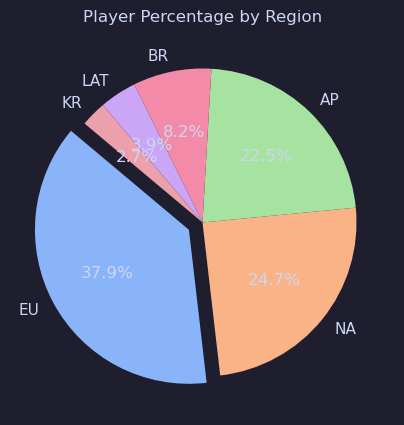

In [659]:
explode = (0.1, 0, 0, 0, 0, 0)

plt.figure(figsize=(5, 5)) 
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Player Percentage by Region') 

plt.show()

Diving deeper in the dataset, it could be inferred from the pie chart that majority of the players are from the European Union (EU) region which accounts for 37.9% of the total observations. It is followed by North America (NA), Asia Pacific (AP), Brazil (BR), Latin America (LAT), and lastly, South Korea.

### Who is the most played agent?

An **agent** refers to playable characters with distinct sets of abilities and play-style. Moreover, understanding the distribution of the top skilled players' most played agent helps us identify those who dominate the highest level of competition.

In [660]:
agent_count_df = val_df['agent_1'].value_counts()
agent_count_df

agent_1
Chamber      19168
Jett         11729
Reyna        10992
Raze          5907
Omen          5809
Sova          5715
Fade          5309
Sage          5051
Viper         3496
Brimstone     3356
KAY/O         1920
Skye          1742
Neon          1063
Killjoy        615
Breach         586
Yoru           566
Cypher         459
Astra          451
Phoenix        134
Name: count, dtype: int64

Text(0.5, 1.0, 'Player count per agent')

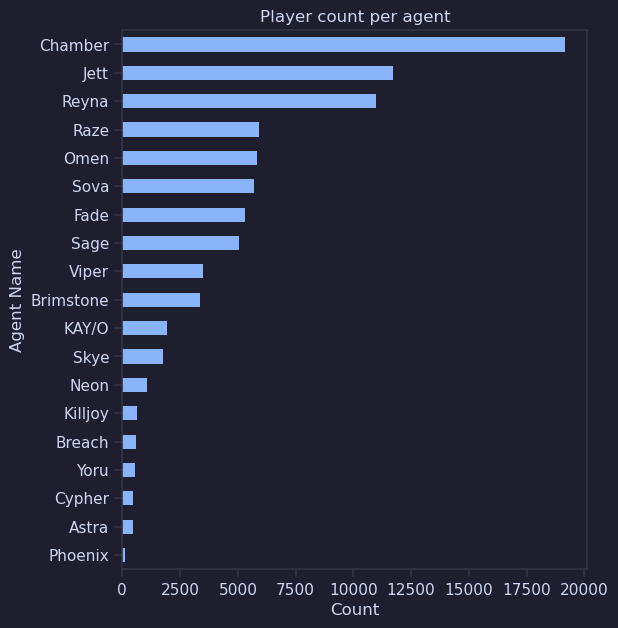

In [661]:
agent_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Agent Name')
plt.title('Player count per agent')

As observed in the bar plot, **Chamber** fits the criteria with 19,168 players consider him as their most picked agent. On the other side of the graph, **Phoenix** is the least picked agent only accounting for 134 players.

### What is the most used gun?


A **gun** refers to a firearm and weapon available for players to use during matches. Furthermore, understanding the preferences of the top players help grasp the game's overall meta.

In [662]:
gun_count_df = val_df['gun1_name'].value_counts()
gun_count_df

gun1_name
Vandal      72452
Phantom     10930
Operator      407
Judge          85
Odin           62
Spectre        45
Sheriff        24
Guardian       18
Ghost          16
Classic         8
Frenzy          7
Marshal         3
Shorty          3
Bulldog         3
Ares            3
Bucky           2
Name: count, dtype: int64

Text(0.5, 1.0, 'Gun count per player')

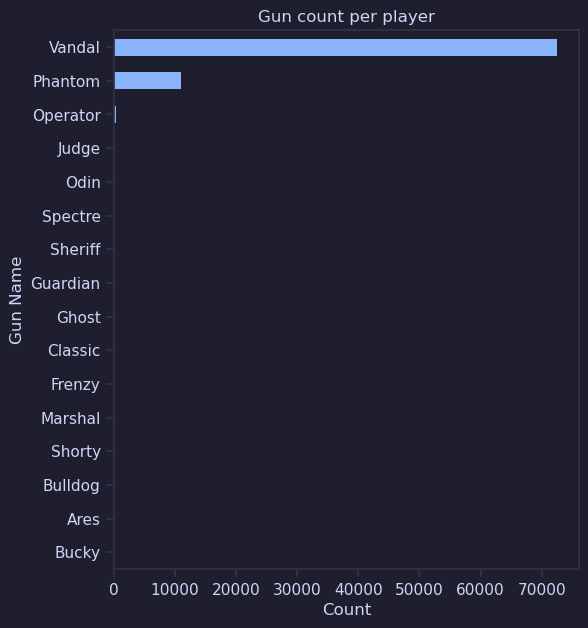

In [663]:
gun_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Gun Name')
plt.title('Gun count per player')

It could be observed that the **Vandal** is the most used gun with 72,452 players having it as their top choice. It is followed by the **Phantom** with a 10,930 player count. However, these two guns greatly skewed the bar plot, which limits us in seeing the order for the least popular guns.

Text(0.5, 1.0, 'Gun count per player')

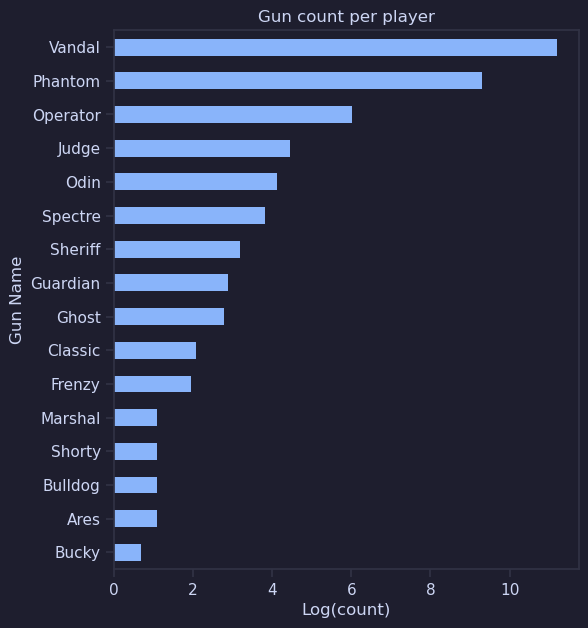

In [664]:
log_gun_count = np.log(gun_count_df)
log_gun_count.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Log(count)')
plt.ylabel('Gun Name')
plt.title('Gun count per player')

We applied log transformation to reduce the effect of extremely high values while preserving the order. With this, the bar plot now shows the order of popularity for other guns.

### What is the average damage per round?

Computing for the **average damage per round** of a top-ranked player contributes to contextualizing their skill level.

In [665]:
agg = val_df.agg({"damage_round": ["mean", "median", "std"]})

In [666]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
mode = val_df['damage_round'].round(2).mode()
std = agg.loc["std"][0]

In [667]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode: ', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 142.83
Median: 142.00
Mode:  141.8, 143.8
Standard Deviation: 16.48


The measure of central tendency posits that they average about 142.83 damage per round with a 16.48 standard deviation. As all agents have a base health amount of 100 health points (increased by shields up to 50), this implies that they eliminate a full HP agent roughly once per round.

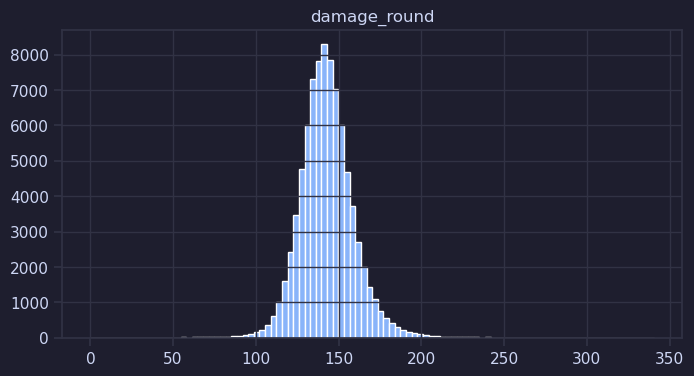

In [668]:
val_df.hist("damage_round", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()

We could observe a symmetrical distribution of **average damage per round** since the mean, median, and mode are relatively equal, and the histogram exhibits general balance.

### What is the average headshot percentage?

**Headshot percentage** is a key statistic in Valorant, for it generally reflects a player's accuracy and aiming skill. Therefore, it is a suitable variable to explore in understanding the observations.

In [669]:
agg = val_df.agg({"headshot_percent": ["mean", "median", "std"]})

In [670]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]
mode = val_df['headshot_percent'].round(2).mode()

In [671]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode:', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 23.60
Median: 23.30
Mode: 22.6
Standard Deviation: 5.19


The measure of central tendency posits that highly ranked players average about 23.60% **headshot percentage** with a 5.19% standard deviation.

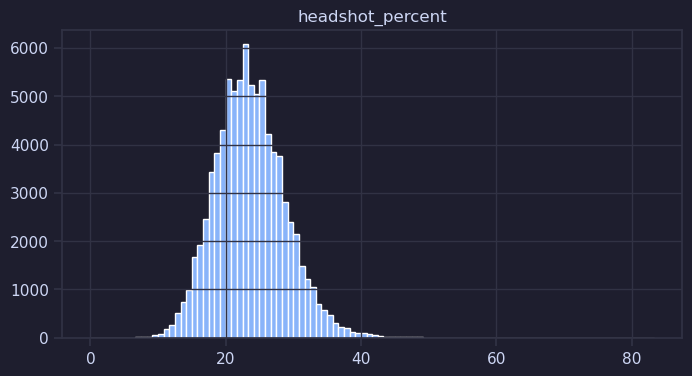

In [672]:
val_df.hist("headshot_percent", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()

We could also observe a symmetrical distribution of **headshot percentage** since the mean, median, and mode are relatively equal, and the histogram exhibits general balance.

### What is the average win percentage?

**Win-percentage** indicates the total number of matches won relative to toal number of matches played.

In [673]:
agg = val_df.agg({"win_percent": ["mean", "median", "std"]})

In [674]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]
mode = val_df['win_percent'].round(2).mode()

In [675]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode:', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 53.89
Median: 52.90
Mode: 50.0
Standard Deviation: 11.38


The measure of central tendency indicates that players with high rankings, on average, have a winning percentage of 53.89%, with standard deviation of 11.38%.

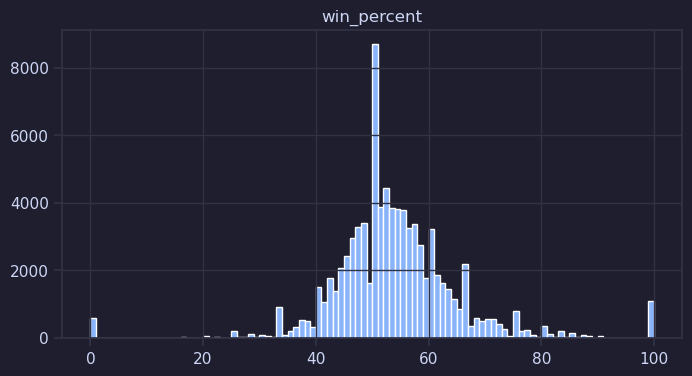

In [676]:
val_df.hist("win_percent", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()

The distribution is approximately symmetrical with slight positive skew indicated by the mean being a bit larger than median and mode. 

### What is the average kill-death ratio?

The **kill-death ratio** is a measure of a player's performance in terms of kills and deaths. It provides insights into a player’s ability to eliminate opponents relative to how often they are eliminated.


In [677]:
agg = val_df.agg({"kd_ratio": ["mean", "median", "std"]})

In [678]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]
mode = val_df['kd_ratio'].round(2).mode()

In [679]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode:', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 1.05
Median: 1.04
Mode: 1.03
Standard Deviation: 0.16


The measure of central tendency posits that, on average, highly ranked players score 1.05 kills for every death, with a 0.16 standard deviation. 

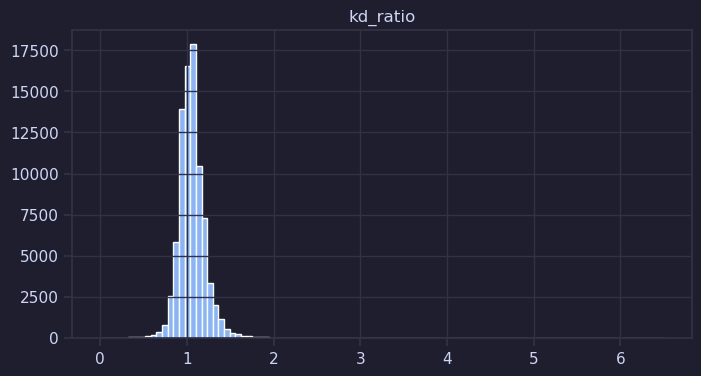

In [680]:
val_df.hist("kd_ratio", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()

We could also observe a symmetrical distribution of **kill-death ratio** since the mean, median, and mode are relatively equal, and the histogram exhibits general balance.

### What is the average number of assists?

**Assists** refer to the number of times the player has helped damage an opponent shortly before it is eliminated by a teammate. 

In [681]:
agg = val_df.agg({"assists": ["mean", "median", "std"]})

In [682]:
mean = agg.loc["mean"][0]
median = agg.loc["median"][0]
std = agg.loc["std"][0]
mode = val_df['assists'].round(2).mode()

In [683]:
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Mode:', ', '.join(map(str, mode)))
print('Standard Deviation: {:.2f}'.format(std))

Mean: 232.61
Median: 187.00
Mode: 100
Standard Deviation: 189.85


The measure of central tendency implies that the mean of the distribution is 232.61 assists. However, the positive skewness of the data indicated by higher mean than median and mode, posits the usage of mode as a better way to gauge the center. Thus, it could be said that highly ranked players average on 187 assists.

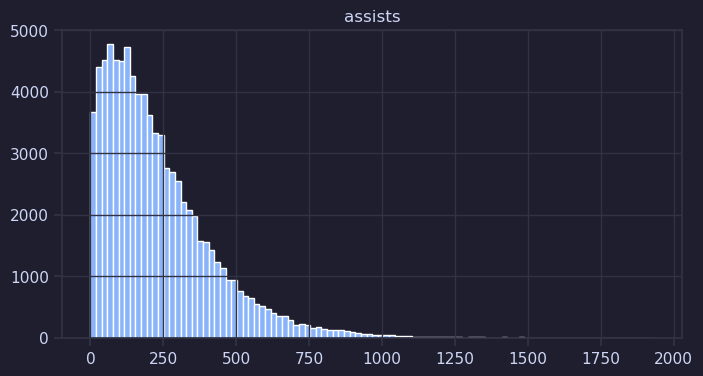

In [684]:
val_df.hist("assists", bins=100, edgecolor='w', figsize=(8, 4))
plt.show()

The histogram shows a distribution that is positively skewed and has a notable presence of outliers on the higher end of the data set.

## Range of Different Variables

In [685]:
# Filter out the columns that are not numerical
variables = val_df.select_dtypes(include=['int', 'float']).columns.tolist()

for var in variables:
    range_var = val_df[var].max() - val_df[var].min()
    print(f"Range for {var}: {range_var}")

Range for damage_round: 340.6
Range for headshots: 5261
Range for headshot_percent: 83.3
Range for aces: 24
Range for clutches: 488
Range for flawless: 316
Range for first_bloods: 1296
Range for kills: 6016
Range for deaths: 5045
Range for assists: 1932
Range for kd_ratio: 6.5
Range for kills_round: 2.0
Range for most_kills: 58
Range for score_round: 550.5
Range for wins: 170
Range for win_percent: 100.0
Range for gun1_head: 100
Range for gun1_body: 100
Range for gun1_legs: 50
Range for gun1_kills: 3845
Range for gun2_head: 100
Range for gun2_body: 100
Range for gun2_legs: 100
Range for gun2_kills: 1279
Range for gun3_head: 100
Range for gun3_body: 100
Range for gun3_legs: 100
Range for gun3_kills: 650
Range for controller_count: 3
Range for duelist_count: 3
Range for initiator_count: 3
Range for sentinel_count: 3


## Presence of Outliers
- Before I start with the analysis, I would like to define what an outlier is. An outlier is a data point that differs significantly from other observations. It is important to identify outliers because they can affect the results of the analysis.


- The first thing I will do is use the describe function to get the summary statistics of the dataset.

In [686]:
summary = val_df.describe()
summary

,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,...,gun2_legs,gun2_kills,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count
count,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,...,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000,84068.000000
mean,142.827201,457.681044,23.601799,1.057477,66.225984,39.050328,100.533425,721.844899,689.873579,232.612219,...,4.513953,116.536268,30.645894,64.854368,4.310915,59.312890,0.596136,0.936076,0.621830,0.761550
std,16.482035,371.632193,5.191078,1.491919,53.050587,31.037088,90.974466,573.736230,547.917946,189.854636,...,3.289087,110.669568,15.912406,15.431870,4.083850,51.197876,0.741276,0.841180,0.690852,0.637935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.800000,184.750000,20.000000,0.000000,27.000000,16.000000,36.000000,296.000000,283.000000,93.000000,...,2.000000,40.000000,20.000000,57.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,142.000000,366.000000,23.300000,1.000000,54.000000,32.000000,75.000000,587.000000,561.000000,187.000000,...,4.000000,84.000000,28.000000,67.000000,4.000000,46.000000,0.000000,1.000000,1.000000,1.000000
75%,151.800000,630.000000,26.800000,2.000000,92.000000,55.000000,137.000000,999.000000,955.000000,322.000000,...,6.000000,158.000000,40.000000,73.000000,6.000000,81.000000,1.000000,2.000000,1.000000,1.000000
max,340.600000,5261.000000,83.300000,24.000000,488.000000,316.000000,1296.000000,6016.000000,5048.000000,1932.000000,...,100.000000,1279.000000,100.000000,100.000000,100.000000,650.000000,3.000000,3.000000,3.000000,3.000000


The next thing I will do is to plot the boxplot of each variable to visualize the outliers.
I will use the seaborn library to plot the boxplot.


### Damage per round

(84068, 43)


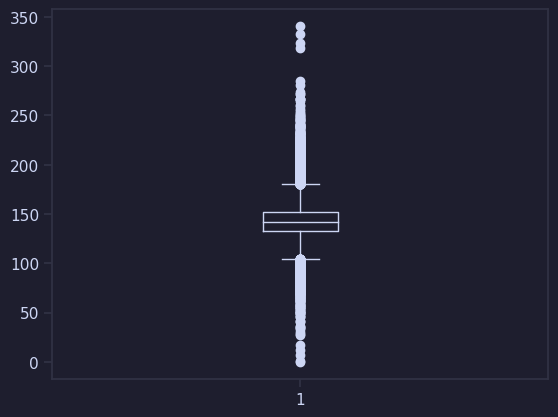

In [687]:
print(val_df.shape)
plt.boxplot(x=val_df['damage_round'])
plt.show()


The boxplot shows that there are a lot of outliers in the `damage_round` variable. The outliers are the dots outside the boxplot. The boxplot also shows that the median is around 140. The boxplot also shows that the data is positively skewed.

The outliers in the `damage_round` variable are the players who deal a lot of damage per round. These players are the ones who are very good at the game.

The outliers to the right of the boxplot are valid data points. These are the players who deal a lot of damage per round. These players are the ones who are very good at the game.

However, the outliers at the very left of the boxplot are invalid data points. Some of these players have a damage per round of 0. Which can mean that they did not play the game during the time frame the data was collected.


These data points will be **removed** from the dataset.

(84065, 43)


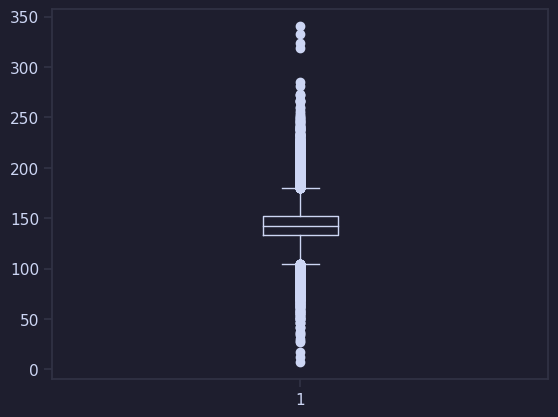

In [688]:
val_df = val_df[(val_df['damage_round'] > 0) & (val_df['gun1_kills'] > 0)]
print(val_df.shape)
plt.boxplot(x=val_df['damage_round'])
plt.show()

### Headshots

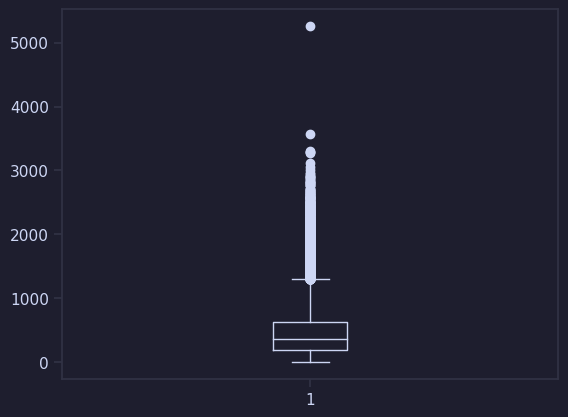

In [689]:
plt.boxplot(x=val_df['headshots'])
plt.show()

The box plot shows that there are a lot of outliers in the `headshots` variable. The outliers are the dots outside the boxplot. The boxplot also shows that the median is around 30. The boxplot also shows that the data is positively skewed.

Moreover, there is a single data point that is very far from the rest of the data points. This data point is an outlier. However, this data point is valid because it is possible to get a lot of headshots in a game. Moreover, this player is just very good at the game.

In [690]:
val_df[val_df['headshots'] > 5000]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count,most_used_agent_type
66692,AP,IPhone13 Pro Max,#0001,Immortal 1,191.5,5261,38.8,19,439,289,...,Bulldog,43,54,3,434,0,2,1,0,duelist


Furthermore, upon closer examination of the dataset, it is apparent that instances where the variable 'headshots' equals zero should not be dismissed as outliers. This is justified by the fact that obtaining zero headshots during gameplay is a plausible outcome, indicative of players who may not have extensive playtime during the time frame of when the data was collected.

In [691]:
val_df[val_df['headshots'] == 0]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count,most_used_agent_type
44283,EU,Nizzz,#NOaim,Immortal 1,30.5,0,15.4,0,0,1,...,Classic,0,0,0,0,0,1,0,0,duelist
44818,EU,Michael Scofield,#Outis,Immortal 1,34.0,0,0.0,0,0,0,...,Ghost,0,0,0,0,0,1,0,0,duelist
53070,EU,Twitch Demra,#Demra,Immortal 1,40.9,0,0.0,0,1,0,...,Ghost,0,0,0,0,0,0,0,1,sentinel


### Headshot Percentage


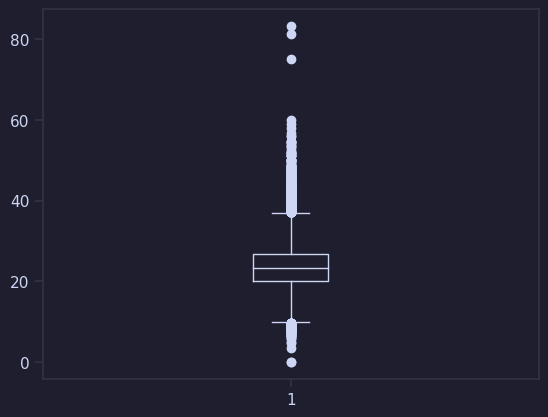

In [692]:
plt.boxplot(x=val_df['headshot_percent'])
plt.show()

Investigating the data points where the `headshot_percent` is greater than 70. These data points are still valid because it is possible to have a headshot percentage greater than 70. Moreover, these players are just very good at the game.

In [693]:
val_df[val_df['headshot_percent'] > 70]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count,most_used_agent_type
3610,NA,yeat,#2022,Immortal 1,28.2,2,75.0,0,0,0,...,Sheriff,0,0,0,0,0,1,0,0,duelist
8038,NA,accountbuyer1000,#poo,Immortal 1,174.6,19,83.3,0,1,3,...,Phantom,100,0,0,2,1,0,0,0,controller
73161,KR,ì €ë³´ë‹¤í‚¬ë‚®ì€ë¶„40ì‚´ì´ìƒìž„,#3384,Immortal 1,111.2,108,81.2,0,13,4,...,Ghost,90,10,0,14,1,1,1,0,controller


Investigating the data points where the `headshot_percent` is equal to 0. These data points are still valid because it is possible to have a headshot percentage of 0. Moreover, these players were not active during the time frame the data was collected.

In [694]:
val_df[val_df['headshot_percent'] == 0]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count,most_used_agent_type
44818,EU,Michael Scofield,#Outis,Immortal 1,34.0,0,0.0,0,0,0,...,Ghost,0,0,0,0,0,1,0,0,duelist
53070,EU,Twitch Demra,#Demra,Immortal 1,40.9,0,0.0,0,1,0,...,Ghost,0,0,0,0,0,0,0,1,sentinel


### Aces

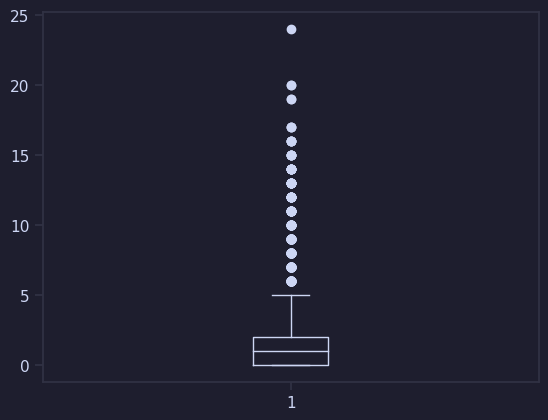

In [695]:
plt.boxplot(x=val_df['aces'])
plt.show()

In [696]:
val_df[val_df['aces'] > 10]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count,most_used_agent_type
35,NA,TK Wicked,#Weeb,Immortal 3,158.2,1906,35.2,11,219,111,...,Sheriff,69,30,1,174,1,1,0,1,controller
1584,NA,fluffy,#idc,Immortal 1,152.0,2136,29.1,12,307,147,...,Spectre,23,73,4,170,0,1,1,1,duelist
4283,NA,Akako,#iwnl,Immortal 1,162.5,1597,27.6,11,168,108,...,Ghost,37,62,1,134,0,2,0,1,duelist
4378,NA,tetsuo,#8721,Immortal 1,163.1,2402,23.1,15,289,189,...,Spectre,23,71,6,505,0,2,0,1,duelist
6525,NA,cpma,#cpma,Immortal 1,163.4,2999,36.8,12,281,211,...,Sheriff,69,30,1,207,0,1,2,0,initiator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82193,BR,mV bb,#7079,Radiant,159.1,2914,32.5,16,326,139,...,Spectre,35,62,3,198,0,2,0,1,duelist
82435,LAT,t1mo,#420,Radiant,194.4,2959,40.3,16,215,153,...,Sheriff,77,22,1,491,0,2,0,1,duelist
85266,LAT,Lali,#0000,Radiant,179.7,2347,23.9,16,281,195,...,Spectre,24,70,6,322,0,3,0,0,duelist
85287,LAT,9c Nat,#mar,Radiant,188.5,2215,43.1,15,212,121,...,Sheriff,50,50,1,74,0,2,0,1,duelist


Investigating the data points where the `aces` is greater than 10. These data points are still valid because it is possible to have more than 10 aces. Moreover, these players are just very good at the game. 

Furthermore, upon closer examination of the dataset, it is apparent that instances where the variable 'aces' equals zero should not be dismissed as outliers. This is justified by the fact that obtaining zero aces during gameplay is a plausible outcome, indicative of players who may not have extensive playtime during the time frame of when the data was collected.


### Clutches


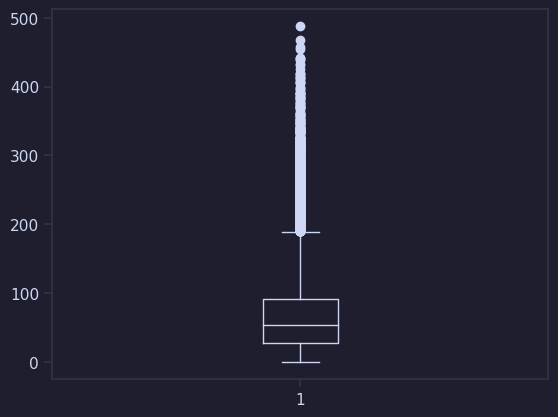

In [697]:
plt.boxplot(x=val_df['clutches'])
plt.show()

Investigating the data points where the `clutches` is greater than 10. These data points are still valid because it is possible to have more than 10 clutches. Moreover, these players are just very good at the game.

### Flawless

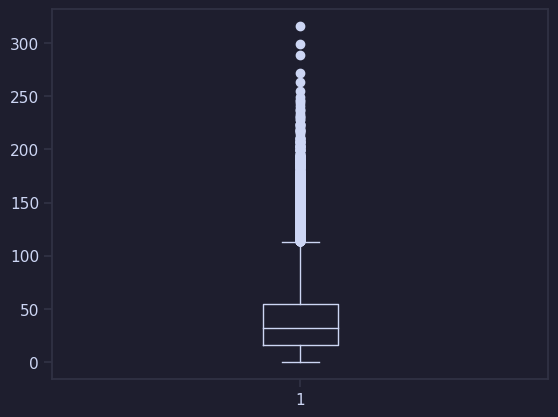

In [698]:
plt.boxplot(x=val_df['flawless'])
plt.show()

Investigating the data points where the `flawless` is greater than 10. These data points are still valid because it is possible to have more than 10 flawless rounds. Moreover, these players are just very good at the game.

### First Bloods

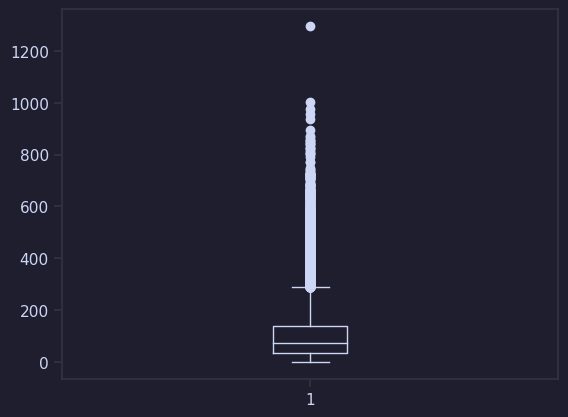

In [699]:
plt.boxplot(x=val_df['first_bloods'])
plt.show()

Investigating the data points where the `first_bloods` is greater than 10. These data points are still valid because it is possible to have more than 10 first bloods. Moreover, these players are just very good at the game.

### Kills

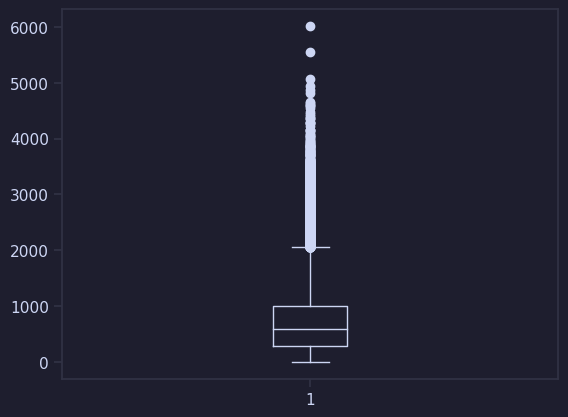

In [700]:
plt.boxplot(x=val_df['kills'])
plt.show()

Investigating the data points where the `kills` are greater than the 4th quartile or equal to 0. These data points are still valid because it possible to have more than 2000 kills and it is also possible to have 0 kills. Moreover, these players are just very good at the game or they were not active during the time frame the data was collected.

### Deaths

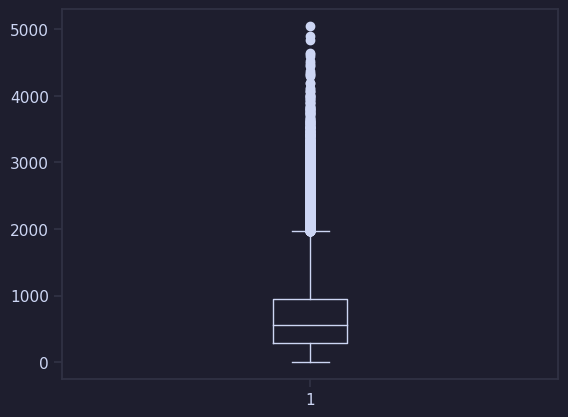

In [701]:
plt.boxplot(x=val_df['deaths'])
plt.show()

Investigating the data points where the `deaths` are greater than the 4th quartile or equal to 0. These data points are still valid because it possible to have more than 2000 deaths and it is also possible to have 0 deaths. Moreover, these players are just very good at the game or they were not active during the time frame the data was collected.

### Assists

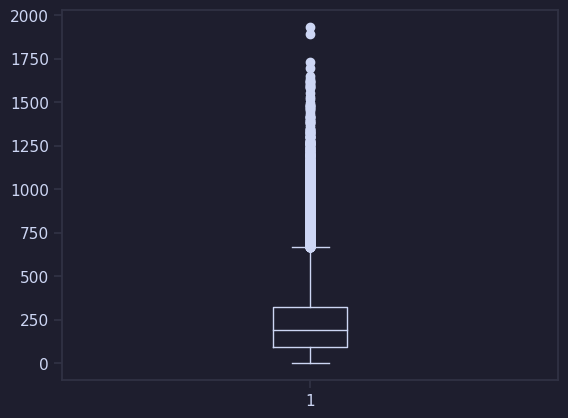

In [702]:
plt.boxplot(x=val_df['assists'])
plt.show()

Investigating the data points where the `assists` are greater than the 4th quartile or equal to 0. These data points are still valid because it possible to have more than 2000 assists and it is also possible to have 0 assists. Moreover, these players are just very good at the game or they were not active during the time frame the data was collected.

### Kill-Death Ratio

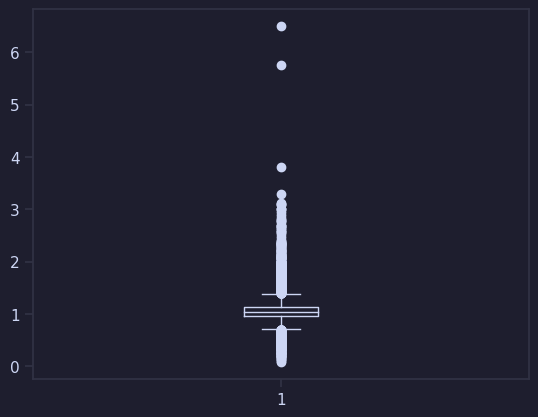

In [703]:
plt.boxplot(x=val_df['kd_ratio'])
plt.show()

Investigating the data points where the `kd_ratio` are greater than the 4th quartile or roughly equal to 0. These data points are still valid because it possible to have more deaths than kills and it is also possible to have more kills than deaths. Moreover, these players are just very good at the game or they were not active during the time frame the data was collected.

In [704]:
val_df[(val_df['kd_ratio'] > 0) & (val_df['kd_ratio'] < 1)]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count,most_used_agent_type
19,NA,LunatiK,#urdog,Radiant,130.1,1702,19.7,3,294,205,...,Spectre,24,68,7,212,0,2,0,1,duelist
20,NA,Summr,#TT7M,Radiant,143.7,953,28.5,4,123,64,...,Sheriff,49,50,1,101,0,2,1,0,duelist
25,NA,attach,#2uu,Radiant,127.7,690,19.1,0,126,72,...,Spectre,23,70,6,123,0,0,2,1,initiator
27,NA,lucas,#fonem,Immortal 3,148.3,1136,28.2,2,138,75,...,Operator,9,91,0,94,0,2,0,1,duelist
29,NA,Moonblue,#0731,Radiant,120.7,899,19.9,2,153,75,...,Spectre,23,69,8,168,1,0,2,0,initiator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85609,LAT,Sebaaah,#STF,Radiant,123.0,568,17.1,3,104,56,...,Classic,28,63,9,65,1,0,1,1,controller
85615,LAT,Humberto Suazo1,#LAS,Radiant,140.6,1086,20.2,0,191,91,...,Spectre,29,65,6,125,0,1,1,1,duelist
85616,LAT,UCV DAMNED,#IMNot,Radiant,134.7,646,22.6,2,115,42,...,Classic,36,61,3,74,1,0,1,1,controller
85651,LAT,lenzinho,#007,Radiant,130.4,495,16.3,0,107,61,...,Phantom,25,69,6,80,0,2,0,1,duelist


### Kills per Round

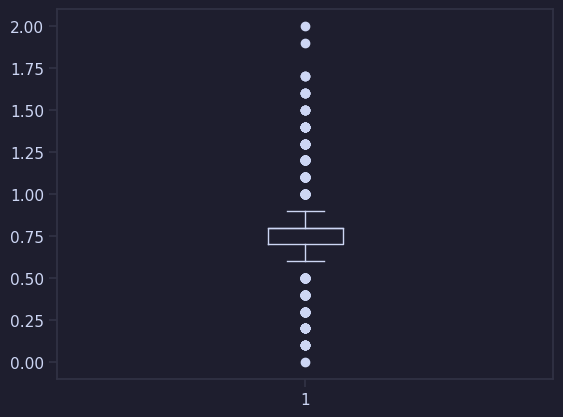

In [705]:
plt.boxplot(x=val_df['kills_round'])
plt.show()

### Most Kills

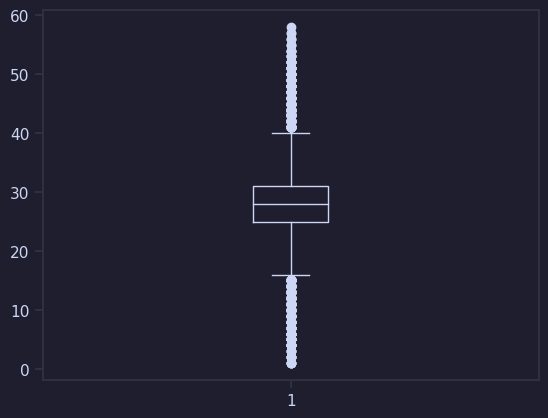

In [706]:
plt.boxplot(x=val_df['most_kills'])
plt.show()

In [707]:
val_df[val_df['most_kills'] < 3]

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count,most_used_agent_type
2146,NA,Espada,#val,Immortal 1,7.3,1,20.0,0,2,1,...,Frenzy,0,0,0,0,1,0,0,0,controller
2455,NA,Spinning Slasher,#NA1,Immortal 1,27.0,1,11.1,0,0,1,...,Vandal,0,0,0,0,0,0,0,1,sentinel
3415,NA,mobin,#cuh,Immortal 1,41.8,2,45.5,0,2,0,...,Ghost,0,0,0,0,0,0,1,0,initiator
3610,NA,yeat,#2022,Immortal 1,28.2,2,75.0,0,0,0,...,Sheriff,0,0,0,0,0,1,0,0,duelist
23866,EU,C9 Kitsune ä¹å°¾ã®ç‹,#fifi,Immortal 1,35.4,1,20.0,0,0,0,...,Frenzy,0,0,0,0,0,0,0,1,sentinel
44283,EU,Nizzz,#NOaim,Immortal 1,30.5,0,15.4,0,0,1,...,Classic,0,0,0,0,0,1,0,0,duelist
44709,EU,WagonLee,#OSS,Immortal 1,35.8,1,16.7,0,0,0,...,Classic,0,0,0,0,1,0,0,0,controller
44818,EU,Michael Scofield,#Outis,Immortal 1,34.0,0,0.0,0,0,0,...,Ghost,0,0,0,0,0,1,0,0,duelist
44970,EU,ryzee,#TAPS,Immortal 1,36.8,1,6.7,0,0,1,...,Ghost,0,0,0,0,1,0,0,0,controller
64506,AP,Marshmello,#1 tap,Immortal 1,12.6,1,50.0,0,1,0,...,Classic,0,0,0,0,0,0,1,0,initiator


With this boxplot, we can see that there are a lot of outliers. The outliers are the dots outside the boxplot. The boxplot also shows that the median is around 20. The outliers are valid data points. These are the players who have a lot of kills in a single game or they were not active during the time frame the data was collected.

### Score per Round

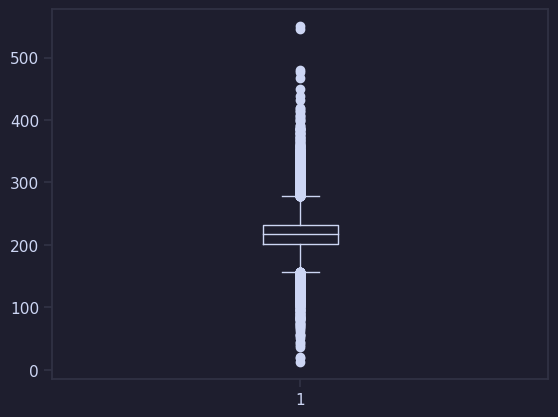

In [708]:
plt.boxplot(x=val_df['score_round'])
plt.show()

## Comparing two variables

### Constructing a correlation matrix
By constructing a correlation matrix, we can see the relationship between the variables.

In [709]:
# Create a correlation matrix on numerical columns. Filter out the columns that are not numerical.
corr_matrix = val_df.select_dtypes(include=['int', 'float']).corr()
corr_matrix

,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,...,gun2_legs,gun2_kills,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count
damage_round,1.000000,0.117776,0.231237,0.275885,0.009307,0.011373,0.186764,0.099290,0.004710,-0.084315,...,-0.133950,0.036666,0.084179,-0.037069,-0.114684,0.059682,-0.272409,0.364411,-0.138320,-0.038824
headshots,0.117776,1.000000,0.149831,0.627179,0.953931,0.933870,0.922401,0.981124,0.966599,0.878361,...,-0.032124,0.782199,0.015362,0.007864,-0.032114,0.864535,-0.070596,0.138743,0.007478,0.015081
headshot_percent,0.231237,0.149831,1.000000,0.108154,-0.005936,-0.020160,0.052870,0.024061,-0.006204,-0.103205,...,-0.297795,-0.047510,0.430846,-0.379446,-0.267313,-0.044808,-0.068226,0.048149,-0.005736,0.009149
aces,0.275885,0.627179,0.108154,1.000000,0.569150,0.551852,0.650648,0.619459,0.572162,0.465827,...,-0.048535,0.476444,0.013068,0.007150,-0.045128,0.548467,-0.125422,0.208021,-0.054552,-0.002250
clutches,0.009307,0.953931,-0.005936,0.569150,1.000000,0.942103,0.915259,0.972617,0.987360,0.919074,...,0.014062,0.793164,-0.057446,0.071679,0.011118,0.879008,-0.053681,0.115671,0.013589,0.021592
flawless,0.011373,0.933870,-0.020160,0.551852,0.942103,1.000000,0.875732,0.958855,0.957855,0.916142,...,0.020635,0.787833,-0.067838,0.079917,0.020768,0.866538,-0.028445,0.075600,0.028371,0.028399
first_bloods,0.186764,0.922401,0.052870,0.650648,0.915259,0.875732,1.000000,0.939245,0.921100,0.769942,...,-0.044426,0.739565,-0.040511,0.065866,-0.039081,0.841944,-0.161361,0.259319,-0.069114,0.028150
kills,0.099290,0.981124,0.024061,0.619459,0.972617,0.958855,0.939245,1.000000,0.986649,0.907927,...,-0.004297,0.808198,-0.051248,0.069343,-0.003398,0.896498,-0.071674,0.133073,0.001254,0.032266
deaths,0.004710,0.966599,-0.006204,0.572162,0.987360,0.957855,0.921100,0.986649,1.000000,0.934197,...,0.013570,0.806797,-0.057990,0.072471,0.010754,0.890723,-0.047830,0.108067,0.016958,0.022782
assists,-0.084315,0.878361,-0.103205,0.465827,0.919074,0.916142,0.769942,0.907927,0.934197,1.000000,...,0.078397,0.783489,-0.082520,0.082248,0.067933,0.838480,0.066889,-0.049616,0.123265,-0.019207


### Heatmap of the correlation matrix
We can visualize the correlation matrix using a heatmap.

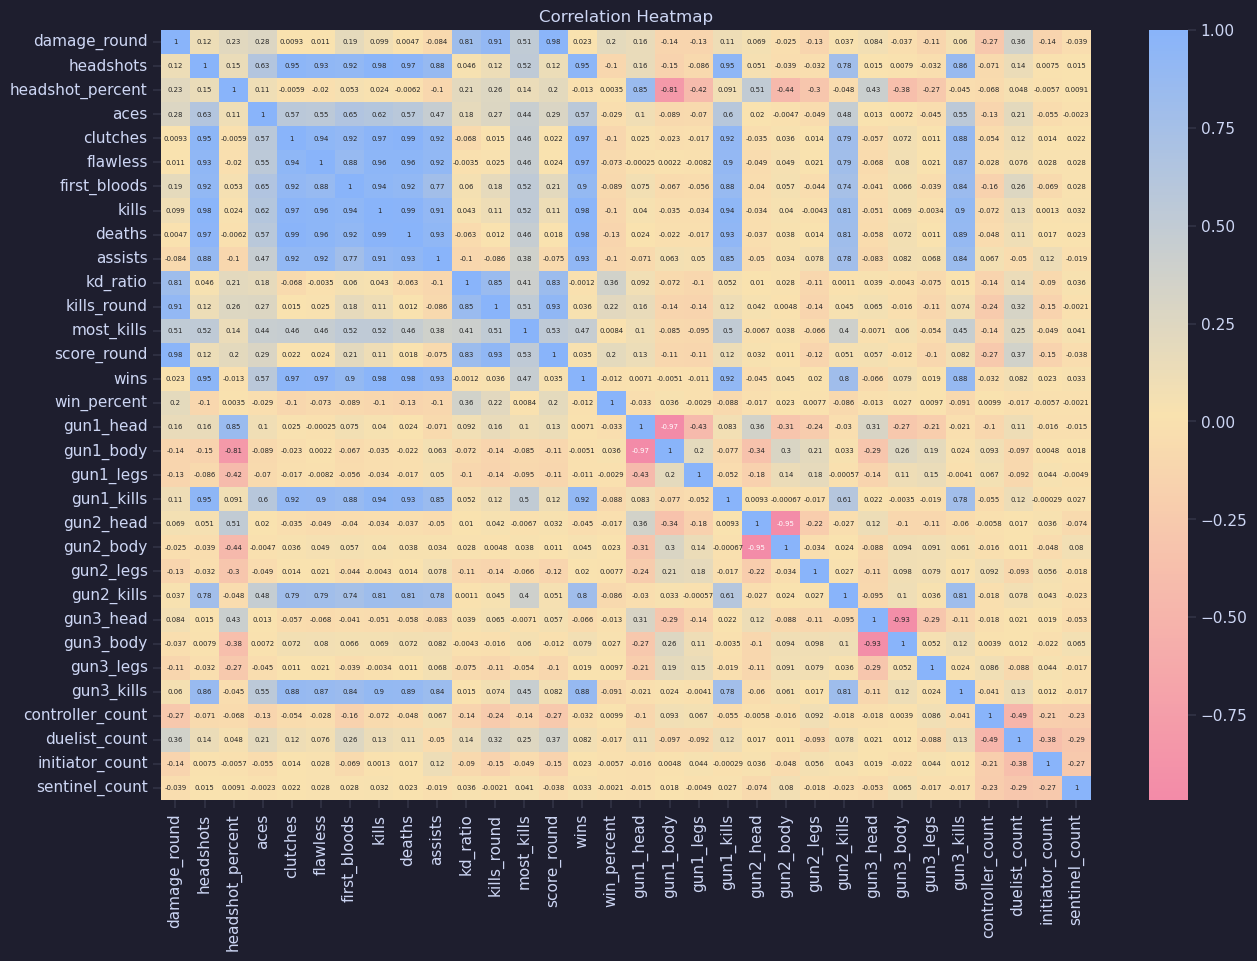

In [719]:
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Correlation Heatmap')
sns.heatmap(corr_matrix, ax=ax, cmap=cmap, annot=True, annot_kws={'size': 5})
plt.show()

We can see that most of the variable pairs have no correlation at all.
We shall investigate the variable pairs that have a correlation of 0.5 or greater, or -0.5 or less.

Let's filter out these variable pairs.

In [726]:
# Filter out the variables that have a correlation of 0.5 or greater, or -0.5 or less
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
filtered_corr_matrix

,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,...,gun2_legs,gun2_kills,gun3_head,gun3_body,gun3_legs,gun3_kills,controller_count,duelist_count,initiator_count,sentinel_count
damage_round,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
headshots,NaN,1.000000,NaN,0.627179,0.953931,0.933870,0.922401,0.981124,0.966599,0.878361,...,NaN,0.782199,NaN,NaN,NaN,0.864535,NaN,NaN,NaN,NaN
headshot_percent,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aces,NaN,0.627179,NaN,1.000000,0.569150,0.551852,0.650648,0.619459,0.572162,NaN,...,NaN,NaN,NaN,NaN,NaN,0.548467,NaN,NaN,NaN,NaN
clutches,NaN,0.953931,NaN,0.569150,1.000000,0.942103,0.915259,0.972617,0.987360,0.919074,...,NaN,0.793164,NaN,NaN,NaN,0.879008,NaN,NaN,NaN,NaN
flawless,NaN,0.933870,NaN,0.551852,0.942103,1.000000,0.875732,0.958855,0.957855,0.916142,...,NaN,0.787833,NaN,NaN,NaN,0.866538,NaN,NaN,NaN,NaN
first_bloods,NaN,0.922401,NaN,0.650648,0.915259,0.875732,1.000000,0.939245,0.921100,0.769942,...,NaN,0.739565,NaN,NaN,NaN,0.841944,NaN,NaN,NaN,NaN
kills,NaN,0.981124,NaN,0.619459,0.972617,0.958855,0.939245,1.000000,0.986649,0.907927,...,NaN,0.808198,NaN,NaN,NaN,0.896498,NaN,NaN,NaN,NaN
deaths,NaN,0.966599,NaN,0.572162,0.987360,0.957855,0.921100,0.986649,1.000000,0.934197,...,NaN,0.806797,NaN,NaN,NaN,0.890723,NaN,NaN,NaN,NaN
assists,NaN,0.878361,NaN,NaN,0.919074,0.916142,0.769942,0.907927,0.934197,1.000000,...,NaN,0.783489,NaN,NaN,NaN,0.838480,NaN,NaN,NaN,NaN


Let's make a heatmap of the filtered correlation matrix.

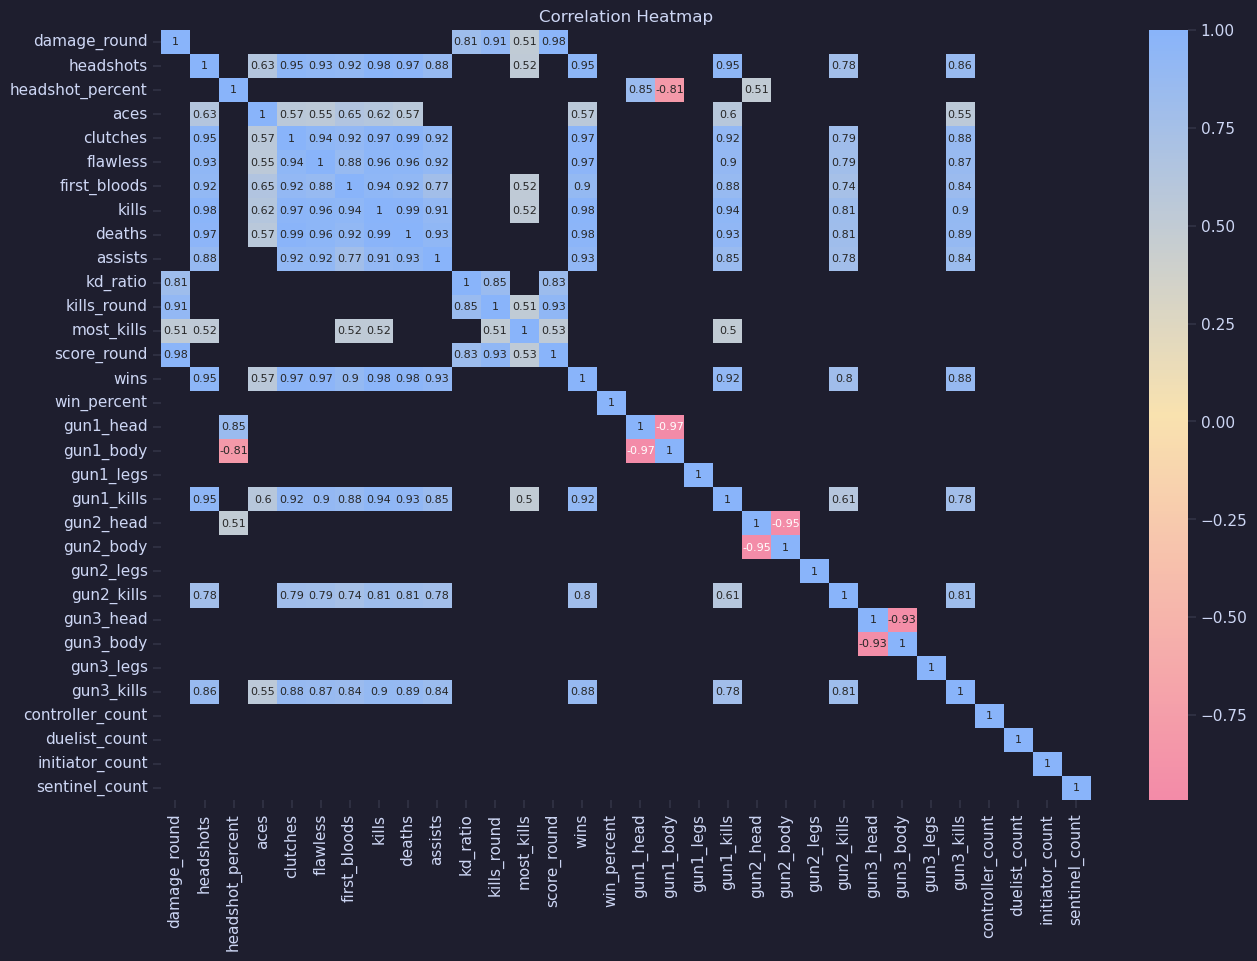

In [728]:
# Create a heatmap of the filtered correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Correlation Heatmap')
sns.heatmap(filtered_corr_matrix, ax=ax, cmap=cmap, annot=True, annot_kws={'size': 8})
plt.show()

### Player's headshot percentage vs. Player's win percentage
Let's compare the player's headshot percentage and the player's win percentage.

First, let's create a dataframe with the columns `headshot_percent` and `win_percent`.

In [711]:
# Create a dataframe with the columns 'headshot_percent' and 'win_percent'
headshot_win_df = val_df[['headshot_percent', 'win_percent']]
headshot_win_df

,headshot_percent,win_percent
0,24.9,59.6
1,28.3,65.8
2,24.0,65.6
3,37.3,62.8
4,24.4,62.8
...,...,...
85673,21.4,76.2
85674,30.1,80.0
85675,30.2,52.0
85676,22.2,66.7


Let's plot the dataframe.

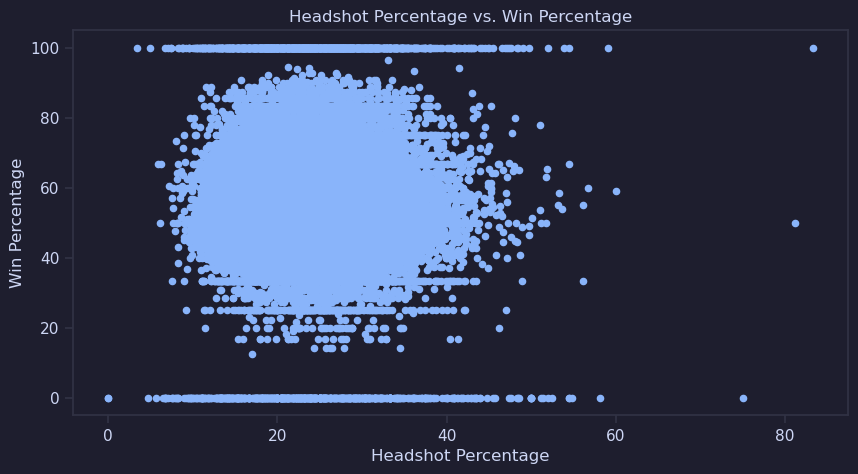

In [712]:
# Plot the dataframe
headshot_win_df.plot.scatter(x='headshot_percent', y='win_percent', figsize=(10, 5))
plt.xlabel('Headshot Percentage')
plt.ylabel('Win Percentage')
plt.title('Headshot Percentage vs. Win Percentage')
plt.show()

From the scatter plot, we can see that there is no correlation between the player's headshot percentage and the player's win percentage.
This means that having a high headshot percentage does not mean that the player will have a high win percentage, and vice versa.

Additionally, we can see that there are a lot of players who have win percentages of 0% and 100%.
These points mean that the player has only played one or two games, and those games were either a win or a loss.

### Player's average damage per round vs. Player's win percentage
Let us check the relationship between the player's average damage per round and the player's win percentage.

In [713]:
# Create a dataframe with the columns 'damage_round' and 'win_percent'
damage_win_df = val_df[['damage_round', 'win_percent']]
damage_win_df

,damage_round,win_percent
0,135.8,59.6
1,170.3,65.8
2,147.5,65.6
3,178.2,62.8
4,149.8,62.8
...,...,...
85673,138.2,76.2
85674,182.9,80.0
85675,158.8,52.0
85676,155.9,66.7


Let's plot the dataframe.

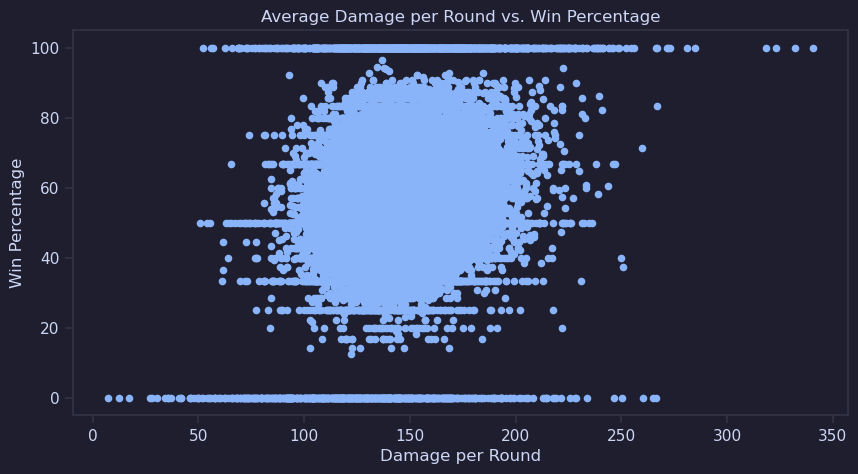

In [714]:
# Plot the dataframe
damage_win_df.plot.scatter(x='damage_round', y='win_percent', figsize=(10, 5))
plt.xlabel('Damage per Round')
plt.ylabel('Win Percentage')
plt.title('Average Damage per Round vs. Win Percentage')
plt.show()

From the scatter plot, we can see that there is no correlation between the player's damage per round and the player's win percentage.
This means that having high damage per round does not mean that the player will have a high win percentage, and vice versa.

Additionally, we can notice that there are a lot of players who have win percentages of 0%, 50%, and 100%.
These points mean that the player has only played one or two games.